In [1]:
from PertDist.pert import PERT
import seaborn as sns
import pandas as pd
import math

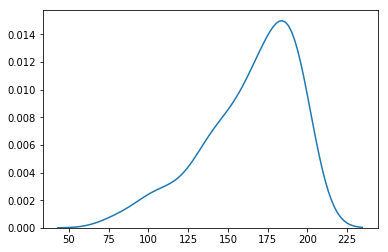

In [2]:
pert = PERT(10, 190, 200)
pert_draw = pert.rvs(100)
plot_pic = sns.kdeplot(pert_draw).figure

In [49]:
#IMPORTANT_TERMS = {
#    'avg_lead_value': [4, 6.4, 10],
#    'quotes_per_account': [2, 4, 6],
#    'average_unit_size': [12000, 15000, 20000]
#    'avg_apr_over_prime': ['min':.5, 'default':1.5, 'max':2.5],
#    'cof_under_prime': ['min':0, 'default':1, 'max':2],
#    'write_offs': ['min':.05, 'default':.2, 'max':.3],
#    'fee_ratio': ['min':.03, 'default':.057, 'max':.065],
#    }

IMPORTANT_TERMS = {
    'avg_lead_value': [6.4, 6.4, 6.4],
    'lead_value_for_quotes': [.5, .5, .5],  # % of the value of leads from financed accounts
    'lead_value_growth_factor': [.05, .05, .05],
    'quotes_per_account': [4, 4, 4],
    'average_unit_size': [20000, 20000, 20000],
    'cof_under_prime': [1, 1, 1],
    'avg_apr_over_prime': [1, 1, 1],
    'monthly_fee_income': [.00057, .00057, .00057],
    'write_offs': [.002, .002, .002],
    'percent_of_quotes_with_dec_pages': [.75, .75, .75]
}

# Don't be too precise with this. Allow many constants. Keep it easy, then expand if necessary.
CONSTANTS = {
    'service_base_salary': 45000,
    'sales_base_salary': 60000,
    'programmer_base_salary': 90000,
    'number_of_management': 3
}

MONTHS_ESTIMATED = 60
PRIME_RATE = 4.75  # Jan 2020

In [4]:
df = pd.DataFrame()

In [5]:
# Values that are vaguely independent of volume
df['number_of_programmers'] = [math.floor(val/12) for val in range(MONTHS_ESTIMATED)]
df['general_expenses'] = [1000 + 1000 * math.floor(val/12) for val in range(MONTHS_ESTIMATED)]
df['server_expenses'] = [300 + 100 * val for val in range(MONTHS_ESTIMATED)]
df['software_expenses'] = df['server_expenses'] * 1.5
df['professional_expenses'] = [1000 + 1000 * math.floor(val/12) for val in range(MONTHS_ESTIMATED)]
df['management_salary'] = [100000 for _ in range(23)] + [150000 for _ in range(MONTHS_ESTIMATED - 23)]
df['marketing_expenses'] = [0, 0, 0] + [2500 for _ in range(12)] + [5000 for _ in range(60 - 12 - 3)]

In [7]:
def return_pert_distribution(vals):
    # They can't all be equal, and they need to be in the proper order (low -> high)
    vals.sort()
    if vals[0] == vals[2]:
        vals[2] += .0000001
    return PERT(vals[0], vals[1], vals[2])

In [8]:
quotes_per_account = return_pert_distribution(IMPORTANT_TERMS['quotes_per_account']).rvs(1)[0]
avg_unit_size = return_pert_distribution(IMPORTANT_TERMS['average_unit_size']).rvs(1)[0]

# SALES ESTIMATES

In [9]:
#MONTHS_BEFORE_SALES_BEGIN = [3, 4, 6]
MONTHS_BEFORE_SALES_BEGIN = [4, 4, 4]

months_before_sales = int(return_pert_distribution(MONTHS_BEFORE_SALES_BEGIN).rvs(1)[0])

In [10]:
def growth_factor_calculation(max_value, cycles, growth_factor, resize=False):
    # Google makes up 88% of search results. 'resize' gives results for that remaining 12%.
    if resize:
        resize_factor = .12 / .88
        adjusted_max = max_value * resize_factor
        returned_list = [growth_factor * adjusted_max]
        for _ in range(cycles - 1):
            returned_list += [returned_list[-1] + (adjusted_max - returned_list[-1]) * growth_factor]
    else:
        returned_list = [growth_factor * max_value]
        for _ in range(cycles - 1):
            returned_list += [returned_list[-1] + (max_value - returned_list[-1]) * growth_factor]

    return returned_list

In [11]:
google_ads = {
    'pf_specific': {
#        'max_searches': [10000, 10672, 11000],
#        'click_through_rate': [.025, .0291, .03],
#        'conversion_ratio': [.03, .0513, .08],
#        'cost_per_click': [2, 2.87, 3.5],
#        'growth_factor': .5,        # PF-specific terms will be the easiest to get high Google relevance with
#        'additional_delay_in_months': 0,
#        'web_traffic_representing_potential_customers': [0.35, 0.5, 0.65]
        
        'max_searches': [21344, 21344, 21344],                 #### UPDATED
        'click_through_rate': [.0291, .0291, .0291],
        'conversion_ratio': [.0513, .0513, .0513],
        'cost_per_click': [2.87, 2.87, 2.87],
        'growth_factor': .5,        # PF-specific terms will be the easiest to get high Google relevance with
        'additional_delay_in_months': 0,
        'web_traffic_representing_potential_customers': [0.5, 0.5, 0.5]
    },
    'insurance_agency__cheap': { # cheap is based on whether the name includes the word insurance or not
#        'max_searches': [100000, 174055, 250000],
#        'click_through_rate': [.025, .0291, .03],
#        'conversion_ratio': [.03, .0513, .08],
#        'cost_per_click': [2, 3, 4],
#        'growth_factor': .25,
#        'additional_delay_in_months': 0,
#        'web_traffic_representing_potential_customers': [.1, .15, .2]
        
        'max_searches': [174055, 174055, 174055],
        'click_through_rate': [.0291, .0291, .0291],
        'conversion_ratio': [.0513, .0513, .0513],
        'cost_per_click': [3, 3, 3],
        'growth_factor': .25,
        'additional_delay_in_months': 0,
        'web_traffic_representing_potential_customers': [.15, .15, .15]

    },
    'insurance_agency__expensive': {
#        'max_searches': [100000, 174055, 250000],
#        'click_through_rate': [.025, .0291, .03],
#        'conversion_ratio': [.03, .0513, .08],
#        'cost_per_click': [10, 13, 15],
#        'growth_factor': .25,
#        'additional_delay_in_months': 0,
#        'web_traffic_representing_potential_customers': [.1, .15, .2]}}

        'max_searches': [174055, 174055, 174055],
        'click_through_rate': [.0291, .0291, .0291],
        'conversion_ratio': [.0513, .0513, .0513],
        'cost_per_click': [13, 13, 13],
        'growth_factor': .25,
        'additional_delay_in_months': 0,
        'web_traffic_representing_potential_customers': [.15, .15, .15]}}


other_online_ads = {
    # Google makes up 88% of web searches, so these max_searches are set to 88% of the top values
    'pf_specific': {
        'additional_delay_in_months': 4
    },
    'insurance_agency__cheap': {
        'additional_delay_in_months': 4
    },
    'insurance_agency__expensive': {
        'additional_delay_in_months': 4}}

def google_ad_growth(df, google_ads, other_online_ads):
    # Make an array for each variable
    for key in google_ads:
        max_search_val = return_pert_distribution(google_ads[key]['max_searches']).rvs(1)[0] \
            * return_pert_distribution(google_ads[key]['web_traffic_representing_potential_customers']).rvs(1)[0]
        ctr_val = return_pert_distribution(google_ads[key]['click_through_rate']).rvs(1)[0]
        conversion_val = return_pert_distribution(google_ads[key]['conversion_ratio']).rvs(1)[0]
        cpc_val = return_pert_distribution(google_ads[key]['cost_per_click']).rvs(1)[0]

        segment1 = [0 for month in range(months_before_sales)] \
            + [0 for month in range(google_ads[key]['additional_delay_in_months'])]
        segment2_len = MONTHS_ESTIMATED - len(segment1)

        generated1 = key + '_accounts_generated_google'
        accounts_generated = segment1 + growth_factor_calculation(
            max_search_val, segment2_len, google_ads[key]['growth_factor'])

        df[generated1] = [val * ctr_val * conversion_val for val in accounts_generated]
        
        quotes_gen1 = key + "_quotes_generated_google"
        df[quotes_gen1] = df[generated1] * quotes_per_account

        # Non-Google ads: same as Google ads, but max_searches are calculated as (google / .88) * .12
        segment1 = [0 for month in range(months_before_sales)] \
            + [0 for month in range(other_online_ads[key]['additional_delay_in_months'])]
        segment2_len = MONTHS_ESTIMATED - len(segment1)

        generated2 = key + '_accounts_generated_bing'
        accounts_generated2 = segment1 + growth_factor_calculation(
            max_search_val, segment2_len, google_ads[key]['growth_factor'], resize=True)
        df[generated2] = [val * ctr_val * conversion_val for val in accounts_generated2]
        
        quotes_gen2 = key + "_quotes_generated_bing"
        df[quotes_gen2] = df[generated2] * quotes_per_account
        
        # Adding costs
        cost_key1 = key + "_cost_google"
        cost_key2 = key + "_cost_bing"
        df[cost_key1] = df[generated1] * cpc_val / ctr_val
        df[cost_key2] = df[generated2] * cpc_val / ctr_val

In [12]:
google_ad_growth(df, google_ads, other_online_ads)

In [13]:
def linkedin_growth_factor_calculation(max_value, cycles, growth_factor):
    returned_list = [growth_factor * max_value]
    for _ in range(cycles - 1):
        returned_list += [returned_list[-1] + (max_value - returned_list[-1]) * growth_factor]
    return returned_list

In [14]:
linkedin = {
#    'cost': 65,
#    'accounts_per_month_at_maturity': [45, 55.5, 70],
#    'growth_factor': .25,
#    'additional_delay_in_months': 1

    'cost': 65,
    'accounts_per_month_at_maturity': [55.5, 55.5, 55.5],
    'growth_factor': .15,                                       ### VALUE CHANGED, but I don't know which is right
    'additional_delay_in_months': 1
}

def linkedin_projections(linkedin):
    total_delay1 = linkedin['additional_delay_in_months'] + months_before_sales
    linkedin_accounts_per_month = [0 for _ in range(total_delay1)] \
        + [1 + math.floor(val/6) for val in range(MONTHS_ESTIMATED - total_delay1)]
    df['linkedin_cost'] = [linkedin['cost'] * val for val in linkedin_accounts_per_month]

    mature_expectations = return_pert_distribution(linkedin['accounts_per_month_at_maturity']).rvs(1)[0]

    linkedin_accounts_generated = [0]
    for index in range(MONTHS_ESTIMATED):
        linkedin_accounts_generated += [linkedin_accounts_generated[-1]\
            + (linkedin_accounts_per_month[index] * mature_expectations - linkedin_accounts_generated[-1]) \
            * linkedin['growth_factor']]

    df['linkedin_accounts'] = linkedin_accounts_generated[1:]
    df['linkedin_quotes'] = df['linkedin_accounts'] * quotes_per_account



trade_associations = {
#    'avg_accounts_per_month_per_association': [3, 5, 8],
#    'fee_per_account': [30, 100, 150],
#    'additional_delay_in_months': 0

    'avg_accounts_per_month_per_association': [5, 5, 5],
    'fee_per_account': [100, 100, 100],
    'additional_delay_in_months': 0
}

def trade_association_projections(trade_associations):
    total_delay2 = trade_associations['additional_delay_in_months'] + months_before_sales
    trade_deals = [0 for _ in range(total_delay2)] + [val +1 for val in range(MONTHS_ESTIMATED - total_delay2)]

    account_guess = return_pert_distribution(trade_associations['avg_accounts_per_month_per_association']).rvs(1)[0]
    df['trade_association_accounts'] = [trade_deals[inx] * account_guess for inx in range(MONTHS_ESTIMATED)]
    df['trade_association_quotes'] = df['trade_association_accounts'] * quotes_per_account

    df['trade_association_costs'] = df['trade_association_accounts'] \
        * return_pert_distribution(trade_associations['fee_per_account']).rvs(1)[0]



data_informed_cold_calls = {
#    'cost_per_hour': [30, 33, 35],
#    'sales_per_hour': [.5, .75, 1.5],
#    'additional_delay_in_months': 1

    'cost_per_hour': [33, 33, 33],
    'sales_per_hour': [.75, .75, .75],
    'additional_delay_in_months': 1
}

def cold_calls(cc_data):
    total_delay3 = cc_data['additional_delay_in_months'] + months_before_sales
    hours_spent_calling = [0 for _ in range(total_delay3)] + [20, 30, 40] + [160 + 120 * math.floor(val/6) for val in range(
        MONTHS_ESTIMATED - total_delay3 - 3)]

    salesperson_cost_per_hour = CONSTANTS['sales_base_salary'] * 1.3 / (50 * 40)
    sales_per_hour = return_pert_distribution(cc_data['sales_per_hour']).rvs(1)[0]

    df['cold_calls_cost'] = [salesperson_cost_per_hour * hour for hour in hours_spent_calling]
    df['cold_calls_accounts'] = [sales_per_hour * hour for hour in hours_spent_calling]
    df['cold_calls_quotes'] = df['cold_calls_accounts'] * quotes_per_account
    df['number_of_salespeople'] = [hours // 120 for hours in hours_spent_calling]

In [15]:
linkedin_projections(linkedin)
trade_association_projections(trade_associations)
cold_calls(data_informed_cold_calls)

# P&L Estimates

In [16]:
df['monthly_new_loans'] = df['pf_specific_accounts_generated_google'] + df['pf_specific_accounts_generated_bing']\
    + df['insurance_agency__cheap_accounts_generated_google'] + df['insurance_agency__cheap_accounts_generated_bing']\
    + df['insurance_agency__expensive_accounts_generated_google'] + df['insurance_agency__expensive_accounts_generated_bing']\
    + df['linkedin_accounts'] + df['cold_calls_accounts'] + df['trade_association_accounts']

df['monthly_new_quotes'] = df['pf_specific_quotes_generated_google'] + df['pf_specific_quotes_generated_bing']\
    + df['insurance_agency__cheap_quotes_generated_google'] + df['insurance_agency__cheap_quotes_generated_bing']\
    + df['insurance_agency__expensive_quotes_generated_google'] + df['insurance_agency__expensive_quotes_generated_bing']\
    + df['linkedin_quotes'] + df['trade_association_quotes'] + df['cold_calls_quotes']

In [17]:
df['monthly_amount_financed'] = df['monthly_new_loans'] * avg_unit_size

m_new_loans = df['monthly_new_loans'].tolist()
# Give the last 10 months + 1/2 the 11th
new_list = []
for index in range(len(m_new_loans)):
    if index <= 10:
        new_list += [sum(m_new_loans[:index + 1])]
    else:
        new_list += [sum(m_new_loans[index - 10: index + 1]) + m_new_loans[index-11] / 2]

df['active_units'] = new_list

In [18]:
# Calculating our AR is hard. Our loans will average durations of ~10.5 months with 9 (or 10) payments.
# I'm doing a simplified interest calculation as an approximation.
m_amt_fin = df['monthly_amount_financed'].tolist()

new_list = []
for index in range(len(m_amt_fin)):
    monthly_ar = m_amt_fin[index]  # This month's AF counts in full towards AR
    if index > 0:
        for ndx in range(index):
            # For every prior month, assign half it's weight as X/9 and the other
            # half as (X-1)/9. 9/9 & 8/9, 8/9 & 7/9, etc.
            months_af = m_amt_fin[index - ndx - 1]
            monthly_ar += max(months_af * ((9 - ndx) / 9) / 2, 0)
            monthly_ar += max(months_af * ((9 - ndx - 1) / 9) / 2, 0)

    new_list += [round(monthly_ar, 0)]

df['monthly_accounts_receivable'] = new_list
df['monthly_outstanding_principal'] = df['monthly_accounts_receivable'] * .98  # This is a reasonable approximation.

In [53]:
# Our leads require work to get to their full value. Features to make insureds more likely to convert to a new agency,
# developing a network to sell leads to, software to support that network, etc.
# I'm assuming it's easy to get some value as soon as we're ready to start selling leads,
# but the growth process will be slow to achieve their full value.

months_before_working_on_lead_value = 9
final_account_lead_value = return_pert_distribution(IMPORTANT_TERMS['avg_lead_value']).rvs(1)[0]
lead_value_growth_factor = return_pert_distribution(IMPORTANT_TERMS['lead_value_growth_factor']).rvs(1)[0]
quote_to_acct_value_ratio = return_pert_distribution(IMPORTANT_TERMS['lead_value_for_quotes']).rvs(1)[0]

returned_list = [final_account_lead_value / 2]
for _ in range(MONTHS_ESTIMATED - months_before_working_on_lead_value - 1):
    returned_list += [returned_list[-1] + (
        final_account_lead_value - returned_list[-1]) * lead_value_growth_factor]

df['account_lead_value'] = [0 for _ in range(months_before_working_on_lead_value)] + returned_list
df['quote_lead_value'] = df['account_lead_value'] * quote_to_acct_value_ratio



# In calculating our income from selling data, I'm assuming a 9 month delay from quote/account to a sale.
# I'm also assuming an average down payment of 15% (85% financed)
monthly_quotes = df['monthly_new_quotes'].tolist()
monthly_accounts = df['monthly_new_loans'].tolist()
avg_financed_portion = .85
quote_total_premium = avg_unit_size / avg_financed_portion
float_to_percent = 1/100

quote_val = df['quote_lead_value'].tolist()
acct_val = df['account_lead_value'].tolist()


### SHOULD HAVE A 3RD GENRE OF LEAD VALUES.
# There should be a different price for quotes w/ dec pages vs accounts. That difference may not emerge
# for a couple years, but eventually it'll be a thing.
quotes_with_dec_pages = return_pert_distribution(IMPORTANT_TERMS['percent_of_quotes_with_dec_pages']).rvs(1)[0]
quotes_w_good_info = [quote * quotes_with_dec_pages for quote in monthly_quotes]
quotes_w_bad_info = [monthly_quotes[index] - val for index, val in enumerate(quotes_w_good_info)]


df['leads_sold__ins_quote_data_only'] = [(val * float_to_percent) \
                                        * quotes_w_bad_info[max(index-8, 0)] \
                                        * quote_total_premium \
                                        for index, val in enumerate(quote_val)]
df['leads_sold__ins_pol_data_included'] = [(val * float_to_percent) \
                                        * (quotes_w_good_info[max(index-8, 0)] + monthly_accounts[max(index-8, 0)]) \
                                        * quote_total_premium \
                                        for index, val in enumerate(acct_val)]

In [20]:
# This is on a cash basis, not accrual, since cash flow will be our early issue.
# Interest payments won't come in until first payments are made, or about 1.5 months after booking an account

cof_under_prime = PRIME_RATE - return_pert_distribution(IMPORTANT_TERMS['cof_under_prime']).rvs(1)[0]
weighted_avg_apr = return_pert_distribution(IMPORTANT_TERMS['avg_apr_over_prime']).rvs(1)[0] + PRIME_RATE
af = df['monthly_amount_financed'].tolist()
principal = df['monthly_outstanding_principal'].tolist()
float_to_decimal = 1/100

df['interest_income'] = [0] + [max(principal[index + 1] - af[index + 1] - (af[index] / 2), 0) * (
    float_to_decimal * weighted_avg_apr / 12) for index, _ in enumerate(af[:-1])]

# Fees aren't paid until payments start coming in
monthly_fee_income = return_pert_distribution(IMPORTANT_TERMS['monthly_fee_income']).rvs(1)[0]
df['fee_income'] = [0, 0] + [val * monthly_fee_income for _, val in enumerate(principal[:-2])]

# We're going to fund as late as possible, typically ~60 days after the loan starts
df['cost_of_funds'] = [0] + [max(principal[index + 1] - af[index + 1] - af[index], 0) * (
    float_to_decimal * cof_under_prime / 12) for index, _ in enumerate(af[:-1])]

# "COF reductions" is interest we earn from crediting held down payments towards our amount funded
# I'm assuming down payments average 15% and we receive the down pays 45 days before funding.
# I'm crediting the whole thing to 1 month. It would be better to spread it out over 2 months.
df['cof_reduction'] = [(month_af / .85 - month_af) * (float_to_decimal * cof_under_prime / 12) * 1.5 for month_af in af]

In [28]:
programmer_cost = df['number_of_programmers'] * CONSTANTS['programmer_base_salary']
sales_cost = df['number_of_salespeople'] * CONSTANTS['sales_base_salary']
df['number_of_service_employees'] = df['monthly_new_loans'] // 200
service_cost = df['number_of_service_employees'] * CONSTANTS['service_base_salary']
management_cost = CONSTANTS['number_of_management'] * df['management_salary']
benefits_multiplier = 1.3
de_annualize = 12

df['salary_and_benefits'] = (programmer_cost + sales_cost + service_cost + management_cost) \
    * benefits_multiplier / de_annualize


programmers = df['number_of_programmers'].tolist()
salespeople = df['number_of_salespeople'].tolist()
df['occupancy_expenses'] = [500 * (CONSTANTS['number_of_management'] + programmers[index] + salespeople[index]) \
                            for index, _ in enumerate(programmers)]


# Industry average cost to service loans is $100. I'm making the assumption that half of that occurs at the beginning,
# with the other half amortized over the rest of the loan.
avg_loan_duration = 10.5
employee_cpu_portion = (sales_cost + service_cost) / 12
df['cost_to_service_loans'] = (df['active_units'] * (100 / avg_loan_duration) - employee_cpu_portion) / 2 \
    + (df['monthly_new_loans'] * 100 - employee_cpu_portion) / 2

In [37]:
write_off_ratio = return_pert_distribution(IMPORTANT_TERMS['write_offs']).rvs(1)[0]
af = df['monthly_amount_financed'].tolist()

df['net_write_off'] = [write_off_ratio * af[max(index-8, 0)] for index in range(len(af))]

In [55]:
df['total_revenue'] = df['leads_sold__ins_quote_data_only'] \
                    + df['leads_sold__ins_pol_data_included'] \
                    + df['fee_income'] \
                    + df['interest_income']

# cold_call_costs is included in salesperson expense
df['total_advertising_expenses'] = df['insurance_agency__cheap_cost_google'] \
                                + df['insurance_agency__cheap_cost_bing'] \
                                + df['insurance_agency__expensive_cost_google'] \
                                + df['insurance_agency__expensive_cost_bing'] \
                                + df['pf_specific_cost_google'] \
                                + df['pf_specific_cost_bing'] \
                                + df['linkedin_cost'] \
                                + df['trade_association_costs'] \


df['total_expenses'] = df['general_expenses'] \
                    + df['marketing_expenses'] \
                    + df['total_advertising_expenses'] \
                    + df['occupancy_expenses'] \
                    + df['cost_to_service_loans'] \
                    + df['server_expenses'] \
                    + df['software_expenses'] \
                    + df['professional_expenses'] \
                    + df['salary_and_benefits'] \
                    + df['cost_of_funds'] \
                    - df['cof_reduction'] \
                    + df['net_write_off']

df['profit'] = df['total_revenue'] - df['total_expenses']

In [61]:
total_loss_before_profitability = sum([val for val in df['profit'].tolist() if val < 0])
print("Losses:", round(total_loss_before_profitability))
print("Final monthly profit:", round(max(df['profit'].tolist())))

#df['profit'].tolist()

Losses: -588918
Final monthly profit: 9732815


In [ ]:
### Make everything callable functions. 
# Call them X times, each time saving losses before profitability, total profitability, and final monthly profit
# Chart those results.

# Make sure the assumption ranges are reasonable.






# Values confirmed with the spreadsheet:
### pf_specific_accounts_generated_google
pf_specific_accounts_generated_bing
quote/account ratio
monthly_new_quotes
insurance_agency__cheap_accounts_generated_google       -- bing isn't on the spreadsheet
insurance_agency__expensive_accounts_generated_google   -- bing isn't on the spreadsheet
trade_association_accounts
cold_calls_accounts    -- different assumptions about when other salespeople start. Off by about 1 month, sometimes.
linkedin_accounts
linkedin_cost
cold_calls_cost    -- different & higher b/c uses salesperson salaries * benefits, not the $33/hour number
active_units
monthly_amount_financed
monthly_accounts_receivable
account_lead_value
quote_lead_value
fee_income
interest_income
cof_reduction
number_of_salespeople
occupancy_expenses
salary_and_benefits
cost_to_service_loans
net_write_off
leads_sold__ins_quote_data_only
leads_sold__ins_pol_data_included